In [9]:
curr_dir =  '/user_data/vayzenbe/GitHub_Repos/LiMA'
import sys
sys.path.insert(0, '/user_data/vayzenbe/GitHub_Repos/flownet2-pytorch')
sys.path.insert(0, curr_dir)

import os, argparse
from collections import OrderedDict

import torch.nn as nn
import torchvision


from torchvision import datasets

import numpy as np
import torch
from LoadImagePairs import LoadImagePairs
from torchvision import transforms

In [3]:
curr_dir =  '/user_data/vayzenbe/GitHub_Repos/LiMA'
import sys
sys.path.insert(0, '/user_data/vayzenbe/GitHub_Repos/flownet2-pytorch')
sys.path.insert(0, curr_dir)
from LoadImagePairs import LoadImagePairs
import torch
from torchvision import transforms
from utils import flow_utils
out_dir = '/user_data/vayzenbe/flow_test'
model = torch.load(f'{curr_dir}/Weights/flownet2S.pt')

checkpoint = torch.load(f'{curr_dir}/Weights/FlowNet2-S_checkpoint.pth.tar')
model.load_state_dict(checkpoint['state_dict'])
model.eval()
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])])
hab_dataset = LoadImagePairs(f'{curr_dir}/Frames/Figure_23_Bulge')
trainloader = torch.utils.data.DataLoader(hab_dataset, batch_size=1, shuffle=False, num_workers = 2, pin_memory=True)
n = 1
for data in trainloader:
    #print(data)
    out = model(data[0][0])
    _pflow = out[0,...].data.cpu().numpy().transpose(1, 2, 0)
    flow_utils.visulize_flow_file(_pflow,f'{out_dir}/im_{n}.jpg',True)
    n +=1
    

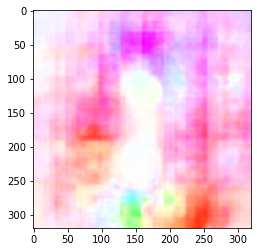

In [8]:
out[0,...].shape

torch.Size([2, 320, 320])

ValueError: x and y can be no greater than 2-D, but have shapes (320,) and (320, 320, 2)

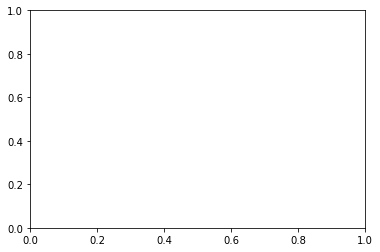

In [11]:
import matplotlib.pyplot as plt
plt.plot(_pflow)

In [10]:

transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])])
hab_dataset = LoadImagePairs(f'{curr_dir}/Frames/Figure_23_Bulge', transform=transform)
trainloader = torch.utils.data.DataLoader(hab_dataset, batch_size=1, shuffle=True, num_workers = 2, pin_memory=True)
for data in trainloader:
    print(data)
    #out = model(data)
    break

tensor([[[[[-0.0801, -0.0801, -0.0801,  ..., -0.0801, -0.0801, -0.0801],
           [-0.0801, -0.0801, -0.0801,  ..., -0.0801, -0.0801, -0.0801],
           [-0.0801, -0.0801, -0.0801,  ..., -0.0801, -0.0801, -0.0801],
           ...,
           [-0.0801, -0.0801, -0.0801,  ..., -0.0801, -0.0801, -0.0801],
           [-0.0801, -0.0801, -0.0801,  ..., -0.0801, -0.0801, -0.0801],
           [-0.0801, -0.0801, -0.0801,  ..., -0.0801, -0.0801, -0.0801]],

          [[ 0.0476,  0.0476,  0.0476,  ...,  0.0476,  0.0476,  0.0476],
           [ 0.0476,  0.0476,  0.0476,  ...,  0.0476,  0.0476,  0.0476],
           [ 0.0476,  0.0476,  0.0476,  ...,  0.0476,  0.0476,  0.0476],
           ...,
           [ 0.0476,  0.0476,  0.0476,  ...,  0.0476,  0.0476,  0.0476],
           [ 0.0476,  0.0476,  0.0476,  ...,  0.0476,  0.0476,  0.0476],
           [ 0.0476,  0.0476,  0.0476,  ...,  0.0476,  0.0476,  0.0476]],

          [[ 0.2696,  0.2696,  0.2696,  ...,  0.2696,  0.2696,  0.2696],
           [ 0.

In [11]:
data.shape

torch.Size([1, 1, 6, 224, 224])

ValueError: axes don't match array

In [12]:

model = torch.load(f'{curr_dir}/Weights/flownet2S.pt')
checkpoint = torch.load(f'{curr_dir}/Weights/FlowNet2-S_checkpoint.pth.tar')
model.load_state_dict(checkpoint['state_dict'])
model.eval()

FlowNet2S(
  (conv1): Sequential(
    (0): Conv2d(6, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): LeakyReLU(negative_slope=0.1, inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): LeakyReLU(negative_slope=0.1, inplace=True)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): LeakyReLU(negative_slope=0.1, inplace=True)
  )
  (conv3_1): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.1, inplace=True)
  )
  (conv4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.1, inplace=True)
  )
  (conv4_1): Sequential(
    (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.1, inplace=True)
  )
  (conv5): Sequential(
    (0): Conv2d(512, 512

In [13]:
out= model(data)

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [64, 6, 7, 7], but got 5-dimensional input of size [1, 1, 6, 224, 224] instead

In [4]:
out = model(data)

RuntimeError: Given groups=1, weight of size [64, 6, 7, 7], expected input[10, 2, 224, 224] to have 6 channels, but got 2 channels instead

In [3]:
hab_dataset = LoadImagePairs(f'{curr_dir}/Frames/Figure_23_Bulge', transform=transform)
trainloader = torch.utils.data.DataLoader(hab_dataset, batch_size=10, shuffle=True, num_workers = 2, pin_memory=True)


IsADirectoryError: Caught IsADirectoryError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/torch/utils/data/_utils/worker.py", line 287, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/user_data/vayzenbe/GitHub_Repos/LiMA/LoadImagePairs.py", line 30, in __getitem__
    image1 = Image.open(img_loc2[0]).convert("RGB")
  File "/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/PIL/Image.py", line 2968, in open
    fp = builtins.open(filename, "rb")
IsADirectoryError: [Errno 21] Is a directory: '/'


In [17]:
hab_dataset.total_imgs

[['Figure_23_Bulge_1.jpg', 'Figure_23_Bulge_2.jpg'],
 ['Figure_23_Bulge_2.jpg', 'Figure_23_Bulge_3.jpg'],
 ['Figure_23_Bulge_3.jpg', 'Figure_23_Bulge_4.jpg'],
 ['Figure_23_Bulge_4.jpg', 'Figure_23_Bulge_5.jpg'],
 ['Figure_23_Bulge_5.jpg', 'Figure_23_Bulge_6.jpg'],
 ['Figure_23_Bulge_6.jpg', 'Figure_23_Bulge_7.jpg'],
 ['Figure_23_Bulge_7.jpg', 'Figure_23_Bulge_8.jpg'],
 ['Figure_23_Bulge_8.jpg', 'Figure_23_Bulge_9.jpg'],
 ['Figure_23_Bulge_9.jpg', 'Figure_23_Bulge_10.jpg'],
 ['Figure_23_Bulge_10.jpg', 'Figure_23_Bulge_11.jpg'],
 ['Figure_23_Bulge_11.jpg', 'Figure_23_Bulge_12.jpg'],
 ['Figure_23_Bulge_12.jpg', 'Figure_23_Bulge_13.jpg'],
 ['Figure_23_Bulge_13.jpg', 'Figure_23_Bulge_14.jpg'],
 ['Figure_23_Bulge_14.jpg', 'Figure_23_Bulge_15.jpg'],
 ['Figure_23_Bulge_15.jpg', 'Figure_23_Bulge_16.jpg'],
 ['Figure_23_Bulge_16.jpg', 'Figure_23_Bulge_17.jpg'],
 ['Figure_23_Bulge_17.jpg', 'Figure_23_Bulge_18.jpg'],
 ['Figure_23_Bulge_18.jpg', 'Figure_23_Bulge_19.jpg'],
 ['Figure_23_Bulge_19.jpg',